# Superstore data analysis
In this notebook, we are going to perform exploratory data analysis on the superstore dataset. The goal is to uncover patterns and trends from the data

### Initial investigation of the data

In [1]:
# modules that will be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read data
data = pd.read_csv("superstore.csv", encoding='Latin-1')

# set seed for reproducibility
np.random.seed(0)

In [2]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
data.shape

(9994, 21)

In [4]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

### Data preprocessing and cleaning
There are no null values in the dataset. We can change the type of the Order Date and Ship Date from object to datatime

In [6]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [8]:
data.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


### Visualizing the data and finding patterns

In [9]:
# Finding the unique values in some of the categories

print(f"Segment: {data['Segment'].unique()}")
print(f"Country: {data['Country'].unique()}")
print(f"Region: {data['Region'].unique()}")
print(f"Category: {data['Category'].unique()}")
print(f"Sub-Category: {data['Sub-Category'].unique()}")

Segment: ['Consumer' 'Corporate' 'Home Office']
Country: ['United States']
Region: ['South' 'West' 'Central' 'East']
Category: ['Furniture' 'Office Supplies' 'Technology']
Sub-Category: ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [10]:
# Find the number of cities
print(f"Cities: {len(data['City'].unique())}")

# Find the number of states
print(f"States: {len(data['State'].unique())}")

Cities: 531
States: 49


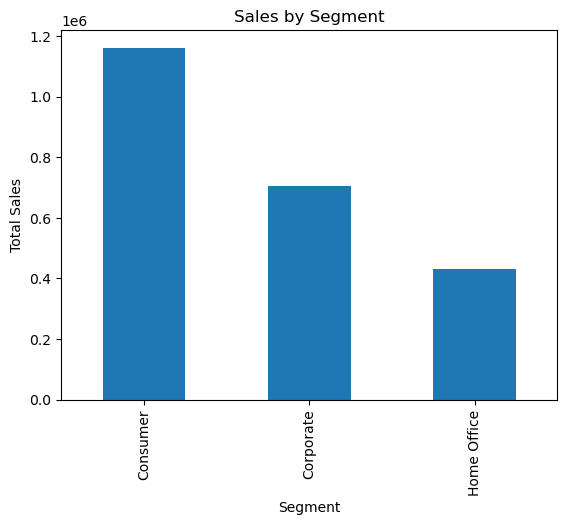

In [11]:
# Sales by segment
data.groupby("Segment")["Sales"].sum().plot(kind='bar')
plt.title('Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.show()

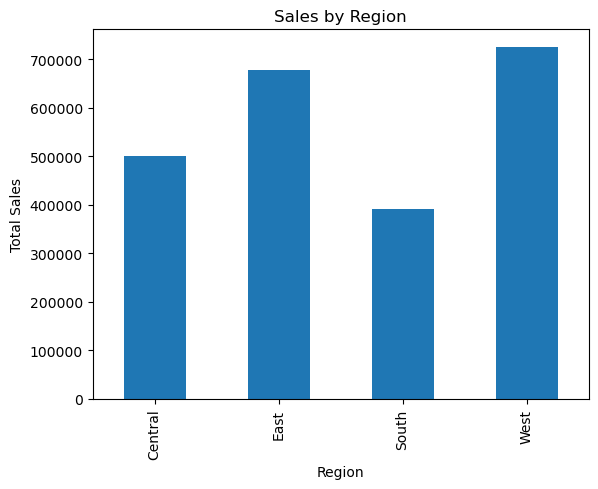

In [12]:
# Sales by region
data.groupby("Region")["Sales"].sum().plot(kind='bar')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

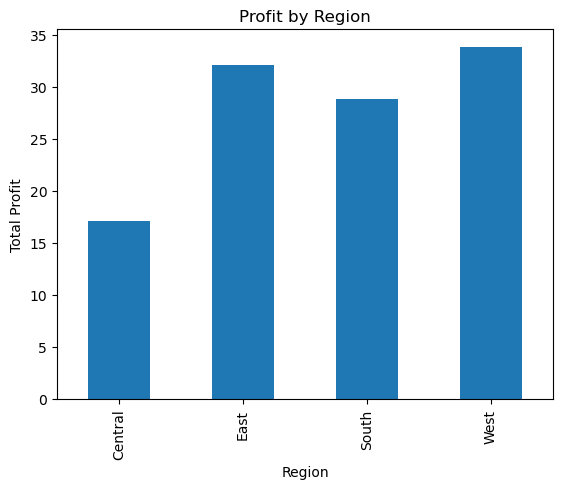

In [13]:
# Profit by region
data.groupby("Region")["Profit"].mean().plot(kind='bar')
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

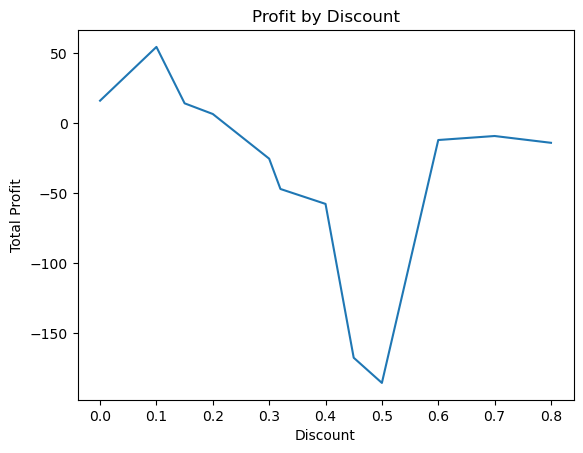

In [14]:
# Mean Profit by discount
data.groupby("Discount")["Profit"].median().plot(kind="line")
plt.title('Profit by Discount')
plt.xlabel('Discount')
plt.ylabel('Total Profit')
plt.show()

It appears having a discount of 10% (0.1) has the highest profit (50) in average

### Time series analysis

In [15]:
# extract information on monthly, yearly and days of week sales

data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.day_of_week

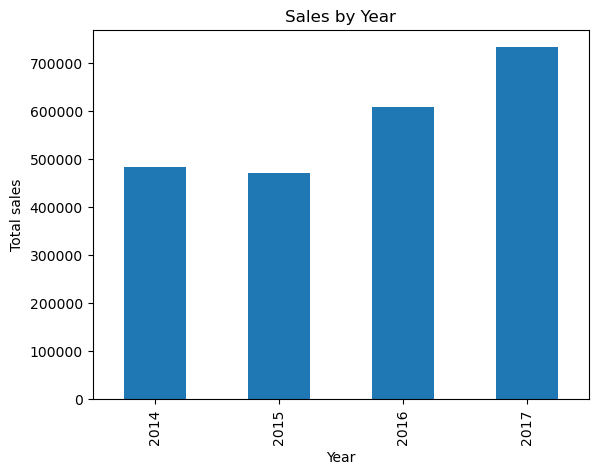

In [16]:
# Sales by month
data.groupby('Order Year')["Sales"].sum().plot(kind="bar")
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total sales')
plt.show()

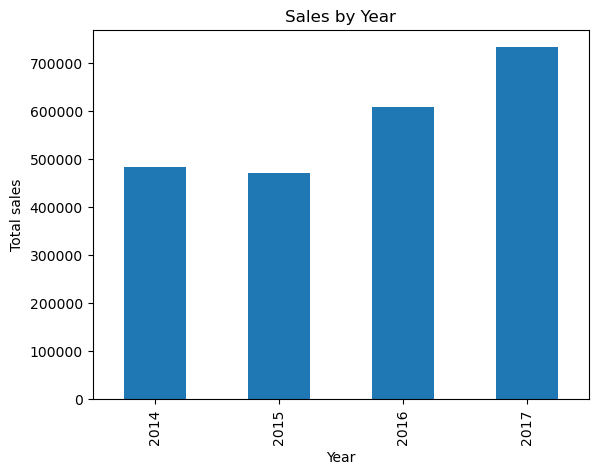

In [17]:
# Sales by year
data.groupby('Order Year')["Sales"].sum().plot(kind="bar")
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total sales')
plt.show()

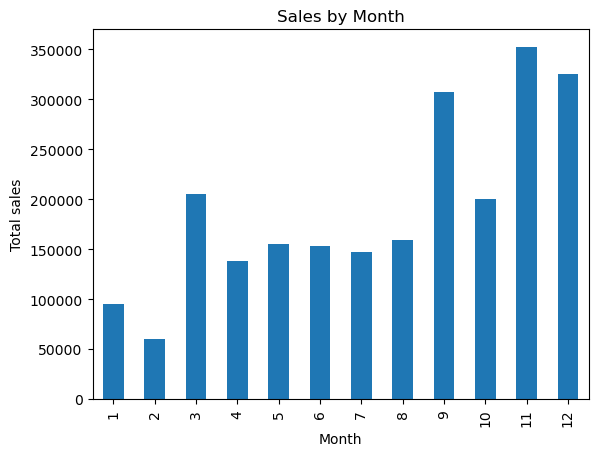

In [18]:
# Sales by month
data.groupby('Order Month')["Sales"].sum().plot(kind="bar")
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total sales')
plt.show()

The sales are much higher during the holiday season (the last 4 months of the year)

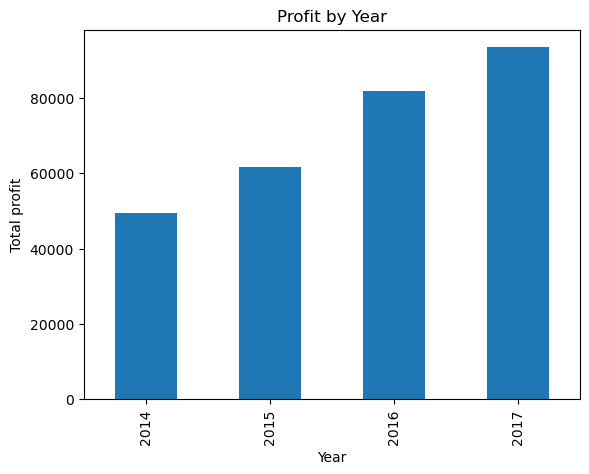

In [19]:
# Profit by year
data.groupby('Order Year')["Profit"].sum().plot(kind="bar")
plt.title('Profit by Year')
plt.xlabel('Year')
plt.ylabel('Total profit')
plt.show()

The profits have increased steadily over the years

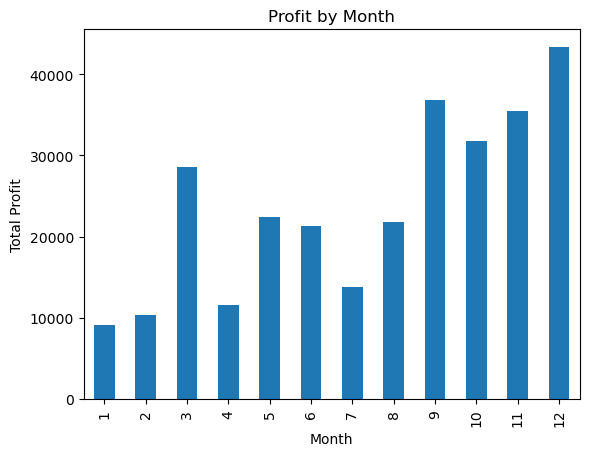

In [20]:
# Sales by month
data.groupby('Order Month')["Profit"].sum().plot(kind="bar")
plt.title('Profit by Month')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.show()

Similar to sales, the profit is higher during the last 4 months of the year. Now let's see the sales on each day of the week.

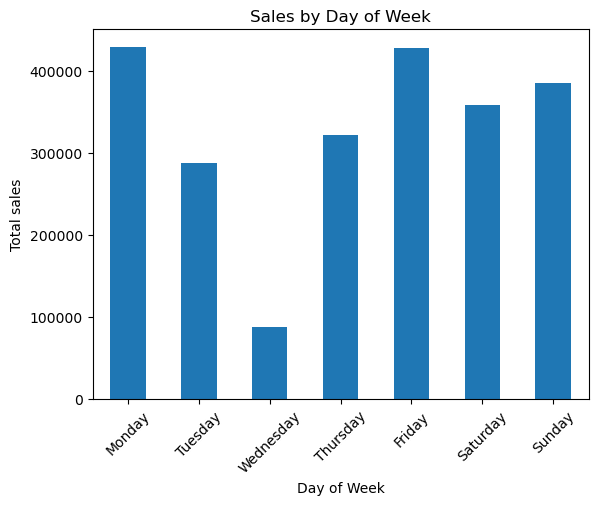

In [21]:
# Sales by day of week
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data.groupby('Order Day of Week')["Sales"].sum().plot(kind="bar")
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total sales')
plt.xticks(ticks=range(len(day_of_week)), labels=day_of_week, rotation=45)
plt.show()

In [22]:
# Sales and profit by segments

sales_and_profit_by_segment = data.groupby('Segment').agg({'Sales' : 'sum', 'Profit' : 'sum'}).reset_index()
sales_and_profit_by_segment

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


In [23]:
# Finding the sales to profit ratio

sales_and_profit_by_segment['Sales to profit ratio'] = sales_and_profit_by_segment['Sales'] / sales_and_profit_by_segment['Profit']
sales_and_profit_by_segment[['Segment', 'Sales to profit ratio']]

,Segment,Sales to profit ratio
0,Consumer,8.659471
1,Corporate,7.677245
2,Home Office,7.125416


In [24]:
data.groupby('Sub-Category').agg({'Sales' : 'sum', 'Profit' : 'sum'}).reset_index()

,Sub-Category,Sales,Profit
0,Accessories,167380.3180,41936.6357
1,Appliances,107532.1610,18138.0054
2,Art,27118.7920,6527.7870
3,Binders,203412.7330,30221.7633
4,Bookcases,114879.9963,-3472.5560
5,Chairs,328449.1030,26590.1663
6,Copiers,149528.0300,55617.8249
7,Envelopes,16476.4020,6964.1767
8,Fasteners,3024.2800,949.5182
9,Furnishings,91705.1640,13059.1436


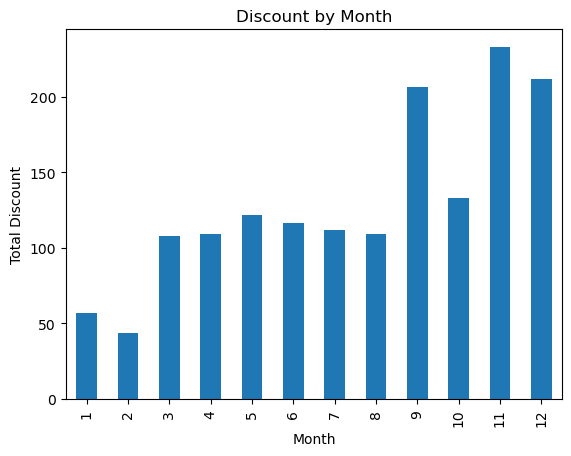

In [25]:
# Discounts by month
data.groupby('Order Month')["Discount"].sum().plot(kind="bar")
plt.title('Discount by Month')
plt.xlabel('Month')
plt.ylabel('Total Discount')
plt.show()

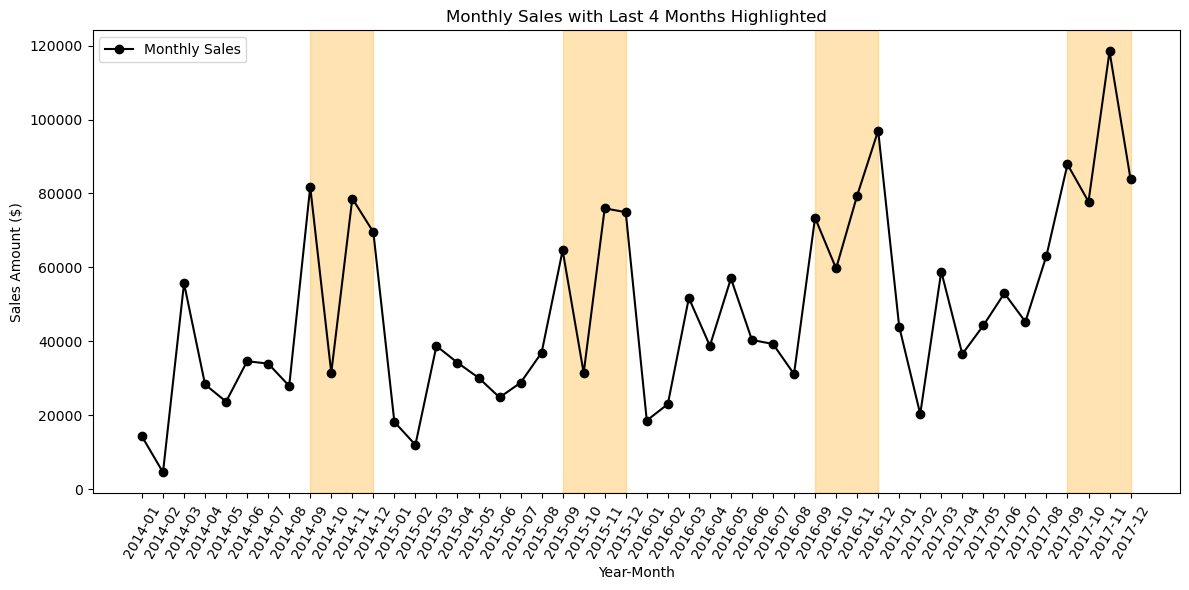

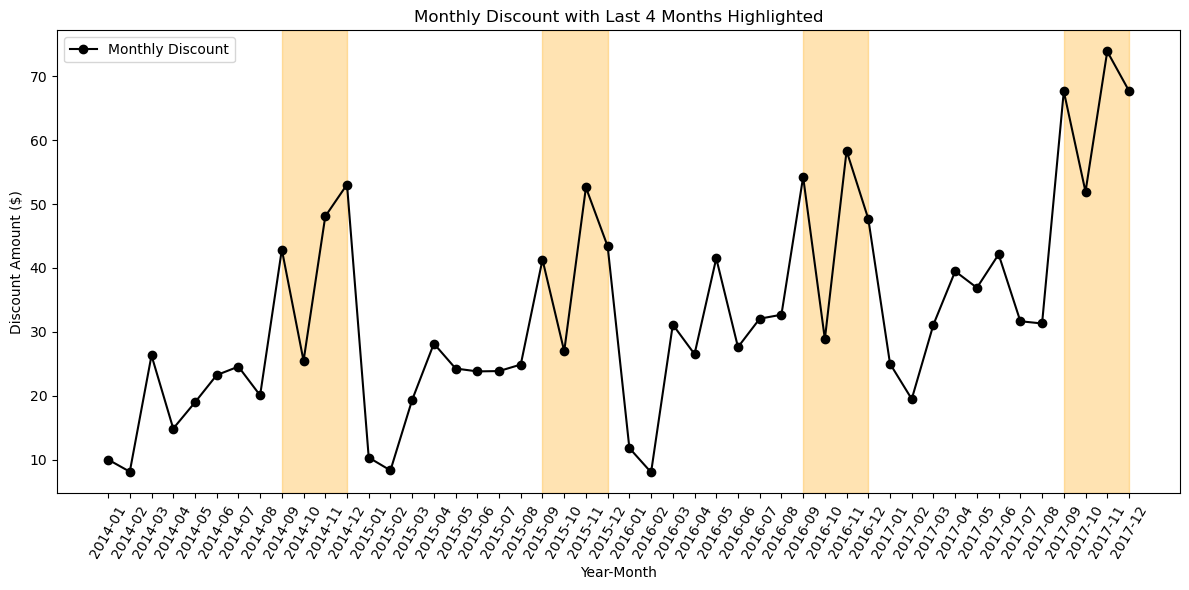

In [26]:
# Group by 'Order Year' and 'Order Month' to sum 'Sales' and 'Discount' by month
monthly_sales = data.groupby(['Order Year', 'Order Month']).agg({'Sales': 'sum', 'Discount': 'sum'}).reset_index()

monthly_sales['Year-Month'] = monthly_sales['Order Year'].astype(str) + '-' + monthly_sales['Order Month'].astype(str).str.zfill(2)

plt.figure(figsize=(12, 6))

plt.plot(monthly_sales['Year-Month'], monthly_sales['Sales'], marker='o', linestyle='-', color='black', label='Monthly Sales')

for year in monthly_sales['Order Year'].unique():
    year_data = monthly_sales[monthly_sales['Order Year'] == year]
    last_4 = year_data.tail(4)
    start_month = last_4['Year-Month'].iloc[0]
    end_month = last_4['Year-Month'].iloc[-1]

    start_idx = monthly_sales[monthly_sales['Year-Month'] == start_month].index[0]
    end_idx = monthly_sales[monthly_sales['Year-Month'] == end_month].index[-1]
    plt.axvspan(start_idx, end_idx, color='orange', alpha=0.3)

plt.title('Monthly Sales with Last 4 Months Highlighted')
plt.xlabel('Year-Month')
plt.ylabel('Sales Amount ($)')
plt.xticks(rotation=60)
plt.tight_layout()

plt.legend()
plt.show()


plt.figure(figsize=(12, 6))

plt.plot(monthly_sales['Year-Month'], monthly_sales['Discount'], marker='o', linestyle='-', color='black', label='Monthly Discount')

for year in monthly_sales['Order Year'].unique():
    year_data = monthly_sales[monthly_sales['Order Year'] == year]
    last_4 = year_data.tail(4)
    start_month = last_4['Year-Month'].iloc[0]
    end_month = last_4['Year-Month'].iloc[-1]

    start_idx = monthly_sales[monthly_sales['Year-Month'] == start_month].index[0]
    end_idx = monthly_sales[monthly_sales['Year-Month'] == end_month].index[-1]
    plt.axvspan(start_idx, end_idx, color='orange', alpha=0.3)

plt.title('Monthly Discount with Last 4 Months Highlighted')
plt.xlabel('Year-Month')
plt.ylabel('Discount Amount ($)')
plt.xticks(rotation=60)
plt.tight_layout()

plt.legend()
plt.show()

In [27]:
data[['Sales', 'Profit', 'Discount']].corr()

,Sales,Profit,Discount
Sales,1.000000,0.479064,-0.028190
Profit,0.479064,1.000000,-0.219487
Discount,-0.028190,-0.219487,1.000000


In [28]:
holiday_sales = data[data['Order Month'] >= 9]['Sales'].sum()
total_sales = data['Sales'].sum()
print(f"Holiday sales: {holiday_sales}")
print(f"Total year sales: {total_sales}")
print(f"The sales in last 4 months accounts for {round(holiday_sales / total_sales * 100, 2)}% of the total sales")

Holiday sales: 1185727.5049
Total year sales: 2297200.8603000003
The sales in last 4 months accounts for 51.62% of the total sales
